# K-Nearest Neighbors Classification
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Setup

### Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

### Load the dataset iris

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df = df[df['Species'] != 0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  100 non-null    float64
 1   Sepal width   100 non-null    float64
 2   Petal length  100 non-null    float64
 3   Petal width   100 non-null    float64
 4   Species       100 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 4.3 KB


### A simple visualization

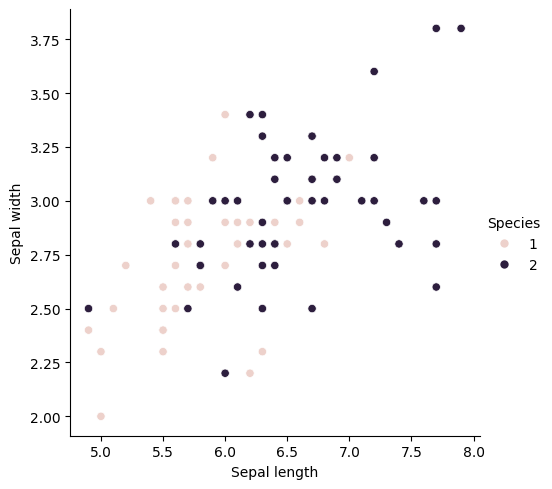

In [6]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:2]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [8]:
X_train[:5]

,Sepal length,Sepal width
93,5.0,2.3
68,6.2,2.2
57,4.9,2.4
128,6.4,2.8
51,6.4,3.2


### Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train[:5]

array([[-1.73565451, -1.49524993],
       [-0.07738587, -1.76711356],
       [-1.87384356, -1.22338631],
       [ 0.19899224, -0.13593181],
       [ 0.19899224,  0.95152268]])

## Train your model

In [11]:
k = 1

In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
y_pred = classifier.predict(X_test)

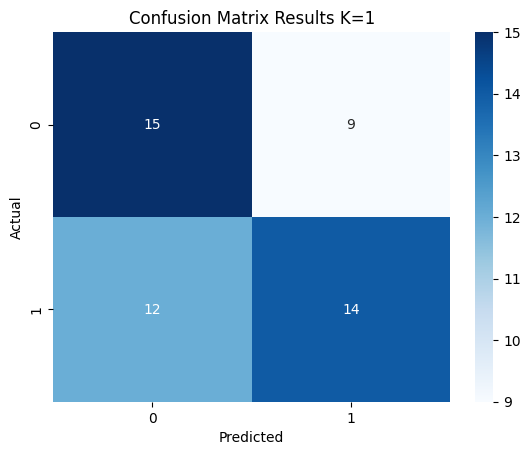

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.62      0.59        24
           2       0.61      0.54      0.57        26

    accuracy                           0.58        50
   macro avg       0.58      0.58      0.58        50
weighted avg       0.58      0.58      0.58        50

Accuracy: 0.58


In [14]:
def plot_results(results, result_name = ""):
    sns.heatmap(results, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix {result_name}')
    plt.show()    

result = confusion_matrix(y_test, y_pred)
plot_results(result,"Results K=1")

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

## Best k

In [15]:
def knn_tuning(k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [16]:
knn_tuning(1)

0.58

In [17]:
knn_tuning(5)

0.6

In [18]:
knn_results = pd.DataFrame({'K':np.arange(1, len(X_train), 5)})

In [19]:
knn_results['Accuracy'] = knn_results['K'].apply(knn_tuning)

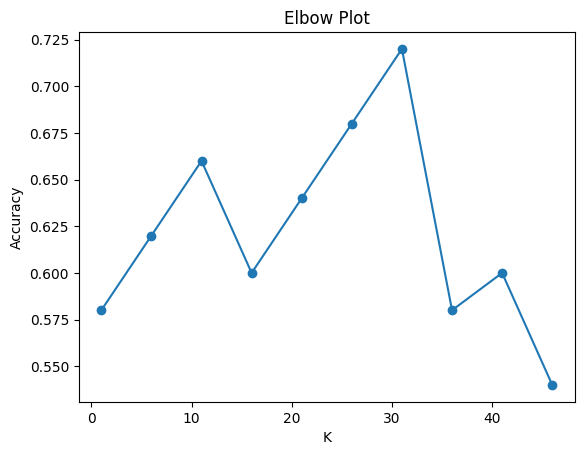

In [20]:

k_values = knn_results['K']
accuracy_values = knn_results['Accuracy']

plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Elbow Plot')
plt.show()

## Optimize weights

In [21]:
def knn_tuning_uniform(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [22]:
def knn_tuning_distance(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'distance')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [23]:
knn_results['Uniform'] = knn_results['K'].apply(knn_tuning_uniform)
knn_results['Distance'] = knn_results['K'].apply(knn_tuning_distance)
knn_results.drop('Accuracy', axis=1, inplace=True)

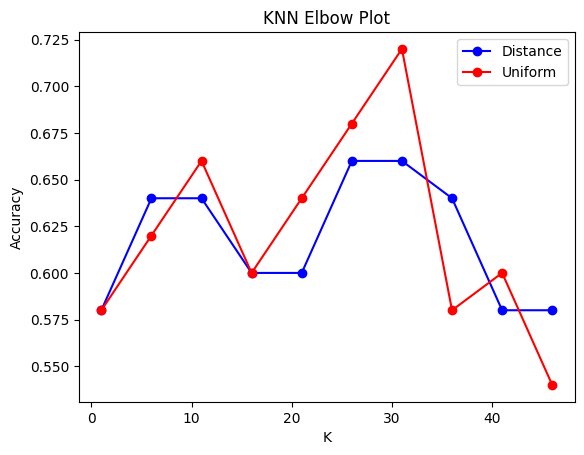

In [24]:
plt.plot(knn_results['K'], knn_results['Distance'], marker='o', color='blue', label='Distance')
plt.plot(knn_results['K'], knn_results['Uniform'], marker='o', color='red', label='Uniform')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Elbow Plot')
plt.legend()
plt.show()
